In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(70.22569897912766, -85.39462130343263),
 (-60.910666100024926, 110.71850522474358),
 (35.719537955512806, 26.802556804624004),
 (49.514415150019545, -8.806277510969409),
 (1.4663798463315771, 37.240501922214946),
 (-68.3614350720841, -95.8361989418969),
 (-10.942943172381163, 153.49155186648113),
 (-85.56545359604259, -99.58178237532495),
 (-50.48273575814665, -147.73050666907562),
 (-42.33359939199809, -87.46393410490658),
 (-5.5709865942031485, -84.94969215403329),
 (-27.805548000144967, -172.77957199816007),
 (-17.594946724041833, 114.97188501026778),
 (-61.858429580445765, -95.75277828197258),
 (-34.21978162589466, 107.55505570378654),
 (-58.22757534928348, 166.01660962032162),
 (-4.375885134564115, 120.4361336395578),
 (-51.78584485606016, -42.804278066813055),
 (-32.77631676989577, 169.5136828566944),
 (41.81666713080543, 104.94054385126094),
 (-82.95379620840886, -24.262932724128603),
 (-57.726074841820775, -179.4013618794449),
 (82.21600298060366, -124.15057485775986),
 (-38.

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b19f44b299f774130882793c1cc2a222


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | karpathos
Processing Record 4 of Set 1 | skibbereen
Processing Record 5 of Set 1 | maralal
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | samarai
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | talara
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | karratha
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | bone
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | ahipara
Processing Record 18 of Set 1 | haibowan
City not found. Skipping...
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1 | villapinzon
Processing

Processing Record 39 of Set 4 | samusu
City not found. Skipping...
Processing Record 40 of Set 4 | okhotsk
Processing Record 41 of Set 4 | victoria
Processing Record 42 of Set 4 | lisakovsk
Processing Record 43 of Set 4 | barawe
City not found. Skipping...
Processing Record 44 of Set 4 | beringovskiy
Processing Record 45 of Set 4 | chardara
Processing Record 46 of Set 4 | broome
Processing Record 47 of Set 4 | hare bay
Processing Record 48 of Set 4 | marzuq
Processing Record 49 of Set 4 | funtua
Processing Record 50 of Set 4 | aktau
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | vila velha
Processing Record 3 of Set 5 | san vicente
Processing Record 4 of Set 5 | arti
Processing Record 5 of Set 5 | sibu
Processing Record 6 of Set 5 | mayo
Processing Record 7 of Set 5 | borogontsy
Processing Record 8 of Set 5 | belmonte
Processing Record 9 of Set 5 | acapulco
Processing Record 10 of Set 5 | kushima
Processing Record 11 of Set 5 | gr

Processing Record 29 of Set 8 | san luis
Processing Record 30 of Set 8 | klyuchi
Processing Record 31 of Set 8 | puerto leguizamo
Processing Record 32 of Set 8 | olinda
Processing Record 33 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 34 of Set 8 | atherton
Processing Record 35 of Set 8 | ngunguru
Processing Record 36 of Set 8 | kloulklubed
Processing Record 37 of Set 8 | tabas
Processing Record 38 of Set 8 | biak
Processing Record 39 of Set 8 | klaksvik
Processing Record 40 of Set 8 | cayenne
Processing Record 41 of Set 8 | alta floresta
Processing Record 42 of Set 8 | nabire
Processing Record 43 of Set 8 | youkounkoun
Processing Record 44 of Set 8 | turukhansk
Processing Record 45 of Set 8 | ketchikan
Processing Record 46 of Set 8 | auch
Processing Record 47 of Set 8 | berlevag
Processing Record 48 of Set 8 | verdalsora
City not found. Skipping...
Processing Record 49 of Set 8 | batticaloa
Processing Record 50 of Set 8 | san pedro
Processing Record 1 of Set 9 | ay

Processing Record 12 of Set 12 | kresttsy
Processing Record 13 of Set 12 | belyy yar
Processing Record 14 of Set 12 | herat
Processing Record 15 of Set 12 | khani
Processing Record 16 of Set 12 | saint-augustin
Processing Record 17 of Set 12 | buncrana
Processing Record 18 of Set 12 | nakajo
City not found. Skipping...
Processing Record 19 of Set 12 | brigantine
Processing Record 20 of Set 12 | takoradi
Processing Record 21 of Set 12 | bonthe
Processing Record 22 of Set 12 | porto walter
Processing Record 23 of Set 12 | port hedland
Processing Record 24 of Set 12 | mandalgovi
Processing Record 25 of Set 12 | newport
Processing Record 26 of Set 12 | warqla
City not found. Skipping...
Processing Record 27 of Set 12 | okoritofulpos
Processing Record 28 of Set 12 | kibala
Processing Record 29 of Set 12 | omboue
Processing Record 30 of Set 12 | yumen
Processing Record 31 of Set 12 | fortuna
Processing Record 32 of Set 12 | pouebo
Processing Record 33 of Set 12 | alexandria
Processing Record

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clyde River,70.47,-68.59,42.80,93,90,10.29,CA,2020-08-04 20:12:30
1,Albany,42.60,-73.97,69.01,92,100,4.00,US,2020-08-04 20:12:31
2,Karpathos,35.51,27.21,77.00,61,0,26.40,GR,2020-08-04 20:12:31
3,Skibbereen,51.55,-9.27,60.80,93,75,20.80,IE,2020-08-04 20:12:31
4,Maralal,1.10,36.70,62.20,72,100,3.40,KE,2020-08-04 20:12:31


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2020-08-04 20:12:30,70.47,-68.59,42.80,93,90,10.29
1,Albany,US,2020-08-04 20:12:31,42.60,-73.97,69.01,92,100,4.00
2,Karpathos,GR,2020-08-04 20:12:31,35.51,27.21,77.00,61,0,26.40
3,Skibbereen,IE,2020-08-04 20:12:31,51.55,-9.27,60.80,93,75,20.80
4,Maralal,KE,2020-08-04 20:12:31,1.10,36.70,62.20,72,100,3.40


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
#(6.3.1)
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

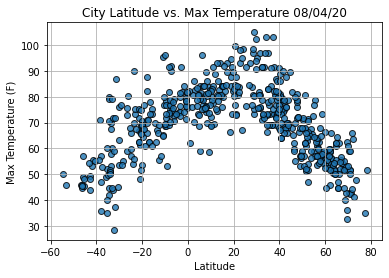

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

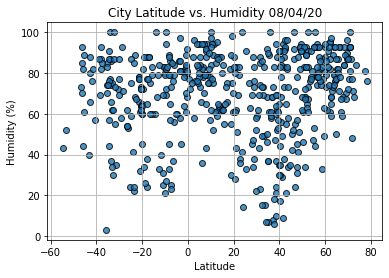

In [16]:
#(6.3.2) Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

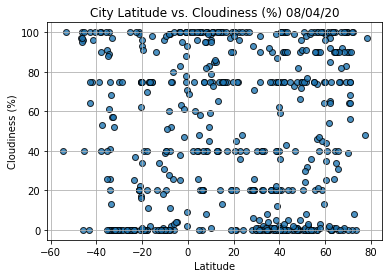

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

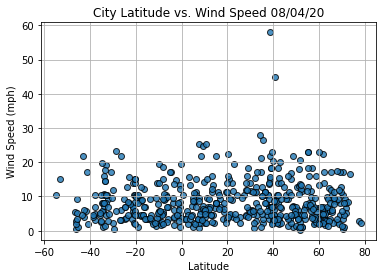

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(f"City Latitude vs. "+ y_label + " " + time.strftime("%x"))
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

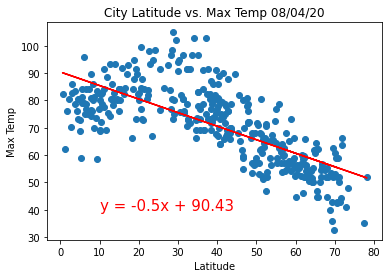

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Northern Hemisphere for Maximum Temperature", 'Max Temp',(10,40))

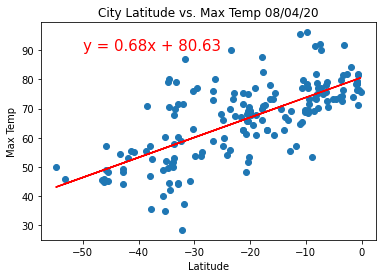

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

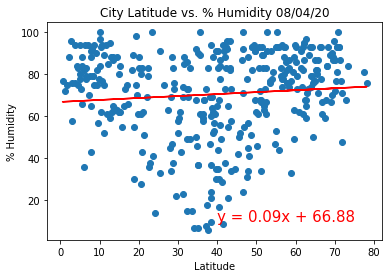

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

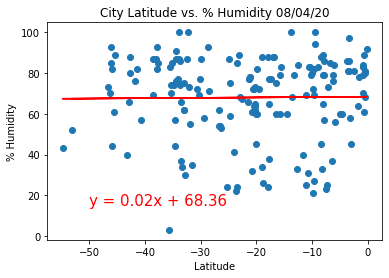

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [25]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2020-08-04 20:12:30,70.47,-68.59,42.80,93,90,10.29
1,Albany,US,2020-08-04 20:12:31,42.60,-73.97,69.01,92,100,4.00
2,Karpathos,GR,2020-08-04 20:12:31,35.51,27.21,77.00,61,0,26.40
3,Skibbereen,IE,2020-08-04 20:12:31,51.55,-9.27,60.80,93,75,20.80
4,Maralal,KE,2020-08-04 20:12:31,1.10,36.70,62.20,72,100,3.40


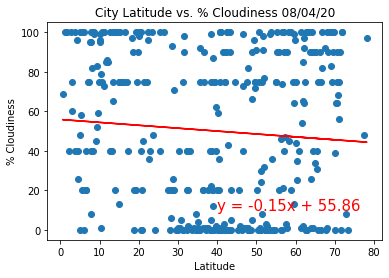

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

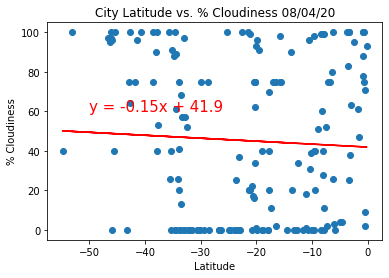

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

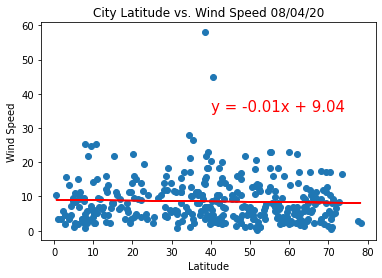

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

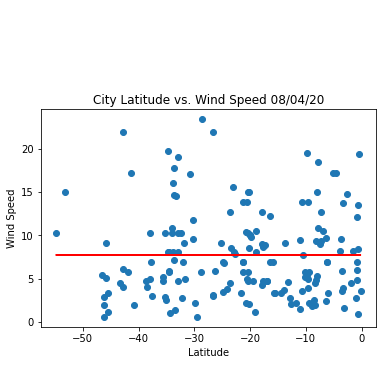

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))